# Pycortex Quickstart

This notebook is intended as a short introduction to (some of) the features of the [pycortex](https://gallantlab.github.io/pycortex/) library. For all features refer to [the documentation](https://gallantlab.github.io/pycortex/api_reference_flat.html) and [the GitHub repository](https://github.com/gallantlab/pycortex).

## Installation

I use miniconda to manage my python environments. For this notebook I created a new environment, activate it and install pycortex following the instructions given on pycortex's website.
In a terminal:

```
conda create --name pycortex
conda activate pycortex

pip install -U setuptools wheel numpy cython
pip install -U pycortex
```

To set up a new conda environment with the needed packages.
Additionally, pycortex requires inkscape to be installed and [accessible](https://gallantlab.github.io/install.html?highlight=inkscape)

For me, installing the package in a conda environment caused the standard configuration options of the package to not work. Pycortex saves files needed for generating plots, such as colourmaps and brain surface meshes to disk. To make sure the package can find these files I had to change the 'filestore' setting in the configuration file.

On linux the file by default lives in 

```
~/config/pycortex/options.cfg
```

The file store folder is in your anaconda installation folder, for me that is

```
/home/daniel/miniconda3/envs/lab_rotation/share/pycortex/db
```

You can also make cortex print these paths for you, to check whether they are correct

In [1]:
import cortex
print(f"The configuration file lives at: {cortex.options.usercfg}")
print(f"cortex looks for necessary files in {cortex.database.default_filestore}")

The configuration file lives at: /home/daniel/.config/pycortex/options.cfg
cortex looks for necessary files in /home/daniel/miniconda3/envs/lab_rotation/share/pycortex/db


Pycortex works with freesurfer files, and offers some subjects for download. For example, if the data you want to plot exists in fsaverage space, you can download the necessary files like this (only needs to be done once):

In [2]:
cortex.utils.download_subject('fsaverage')

/home/daniel/miniconda3/envs/lab_rotation/lib/python3.9/site-packages/cortex/utils.py:1014: UserWarning: fsaverage is already present in the database. Set download_again to True if you wish to download the subject again.
  warnings.warn(


## Flatmaps

Flatmaps can be created using the 'quickflat' module of pycortex.
To create a flatmap plot, the data first needs to be stored in a 'Vertex' object provided by cortex.
A Vertex object contains the data to be plotted, as well as the name of the freesurfer subject the data belongs to.
This allows pycortex to select the appropriate mesh to plot the data on to.
Note that, as each subject generated in freesurfer potentially has a different number of vertices the dimensionality of the data needs to match that of the mesh created by freesurfer.

A Vertex object can then be plotted using cortex.
The created plot can be treated just like any other plot generated with matplotlib, and we can use matplotlib's figures to arrange multiple flatmaps in a figure, as well as add more information.

Note: for quick test plots, make_figure is also accessible via an alias as "cortex.quickshow"

<Figure size 432x288 with 0 Axes>

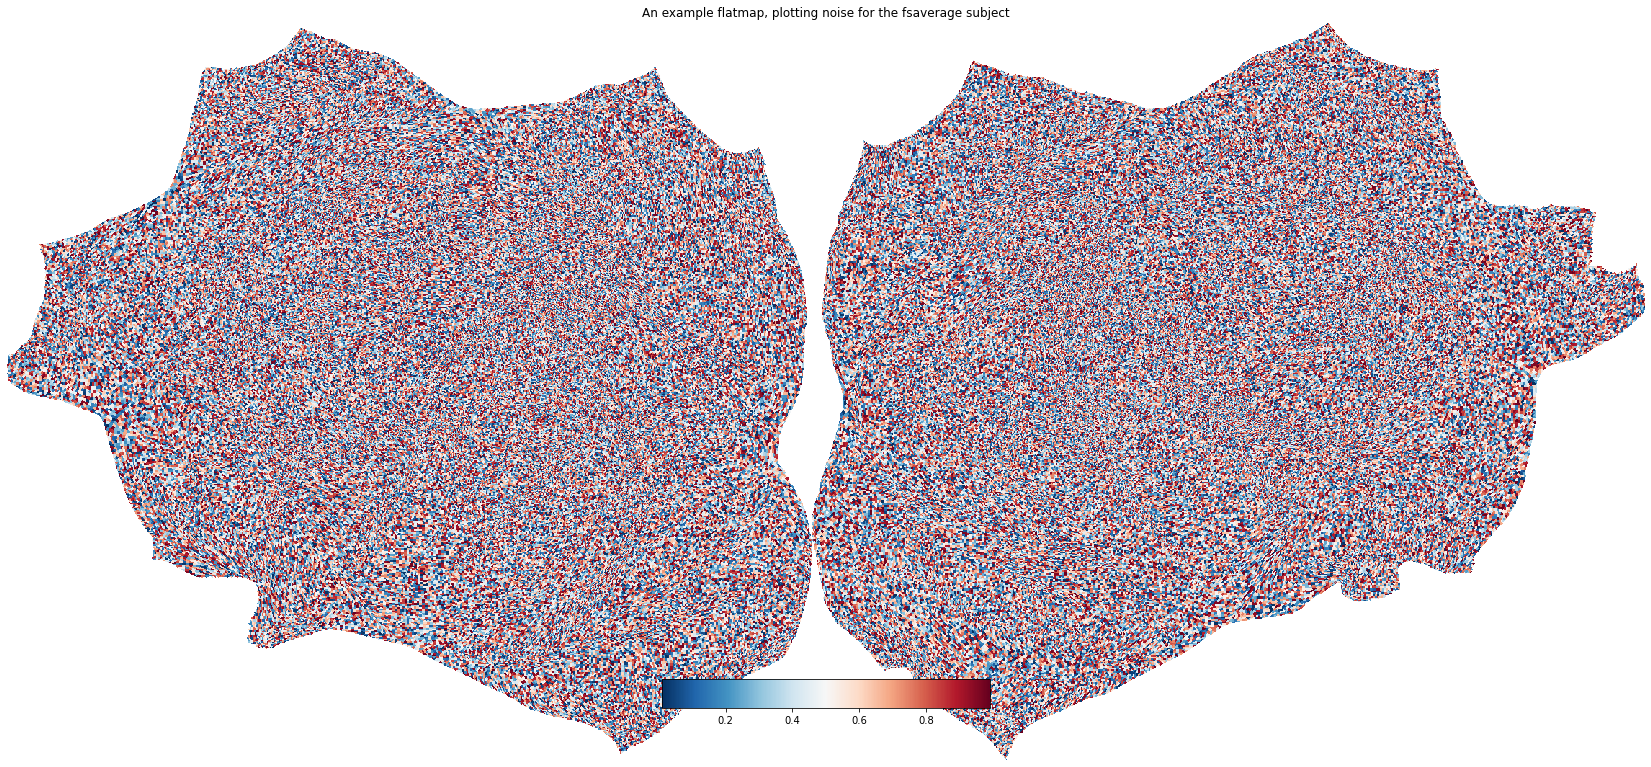

In [13]:
import numpy as np
import matplotlib.pyplot as plt

dim = 327684  # number of vertices in fsaverage space
data = np.random.random(dim)  # generate random data for an example plot
subject = "fsaverage"  # the fsaverage subject downloaded above
vert = cortex.Vertex(data, subject)


plt.figure()
cortex.quickflat.make_figure(vert, with_rois=False, with_labels=False)
plt.title("An example flatmap, plotting noise for the fsaverage subject")
plt.show()

cortex can also visualize ROIs and their labels. With the default settings these are barely visible due to the strong colours in the default colourmap. However, in my experience cortex works well with colourmaps defined with matplotlib, so we can choose a matplotlib colourmap and adjust the alpha channel to make the data slightly transparent.

[see here](https://stackoverflow.com/questions/37327308/add-alpha-to-an-existing-matplotlib-colormap)

Additionally, cortex provides predefined [colourmaps](https://gallantlab.github.io/colormaps.html) some of which are also transparent by default.

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


<Figure size 432x288 with 0 Axes>

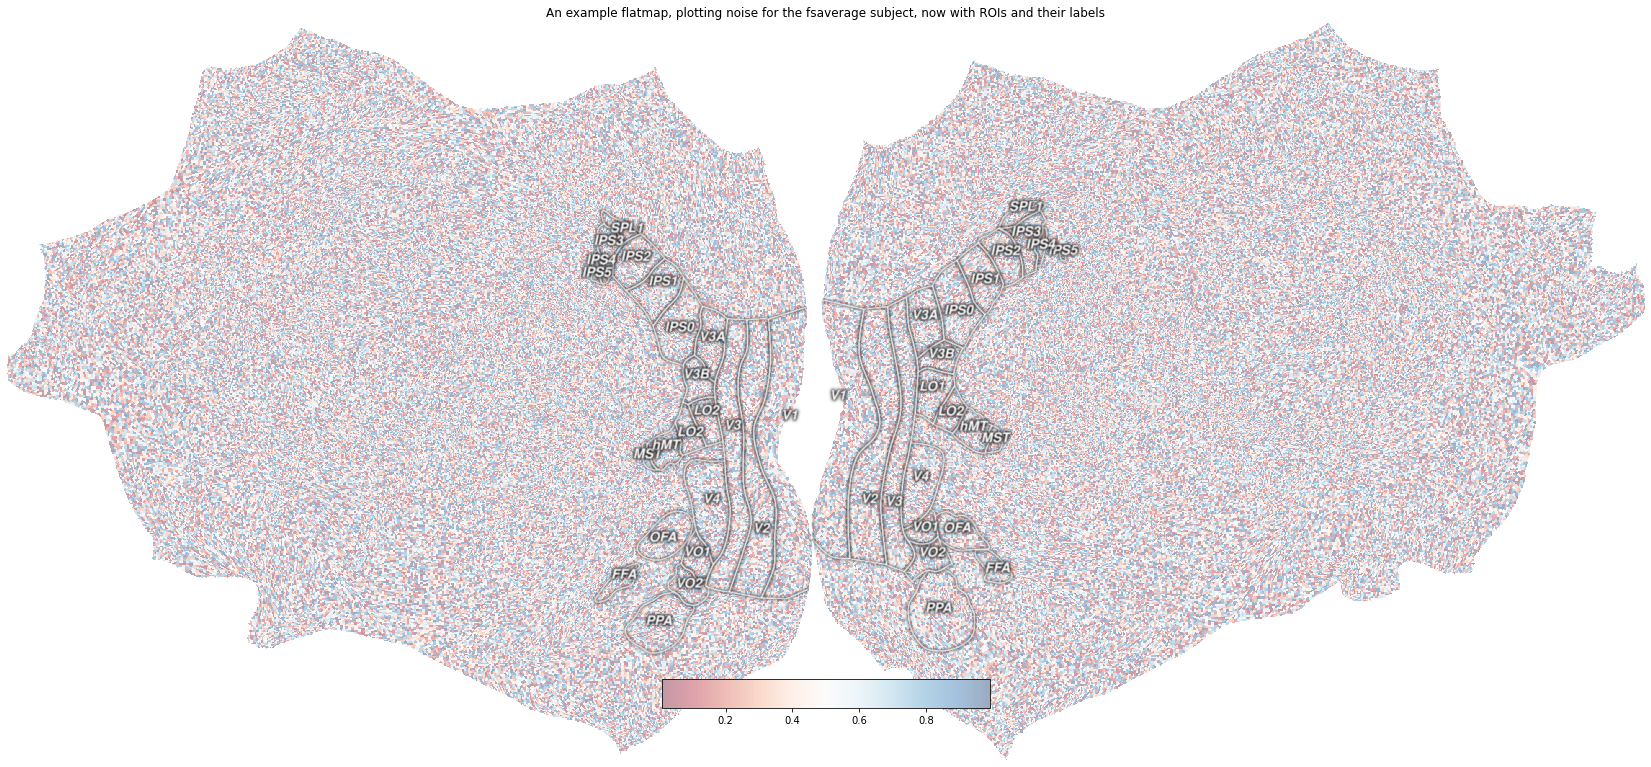

In [24]:
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

# Get the colormap colors
cmap = pl.cm.RdBu  # choose a colourmap
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = 0.4

# convert to a matplotlib colourmap
my_cmap = ListedColormap(my_cmap)

# create Vertex object as before, choosing our new colourmap
vert = cortex.Vertex(data, subject, cmap=my_cmap)
plt.figure()
cortex.quickflat.make_figure(vert, 
                             with_rois=True,  # display regions of interes 
                             with_labels=True)  # and also their labels
plt.title("An example flatmap, plotting noise for the fsaverage subject, now with ROIs and their labels")
plt.show()

We can also display our data as an overlay on top of the brain curvature:

Background RRGGBBAA: ffffff00
Area 0:0:2274.66:1024 exported to 2275 x 1024 pixels (96 dpi)


<Figure size 432x288 with 0 Axes>

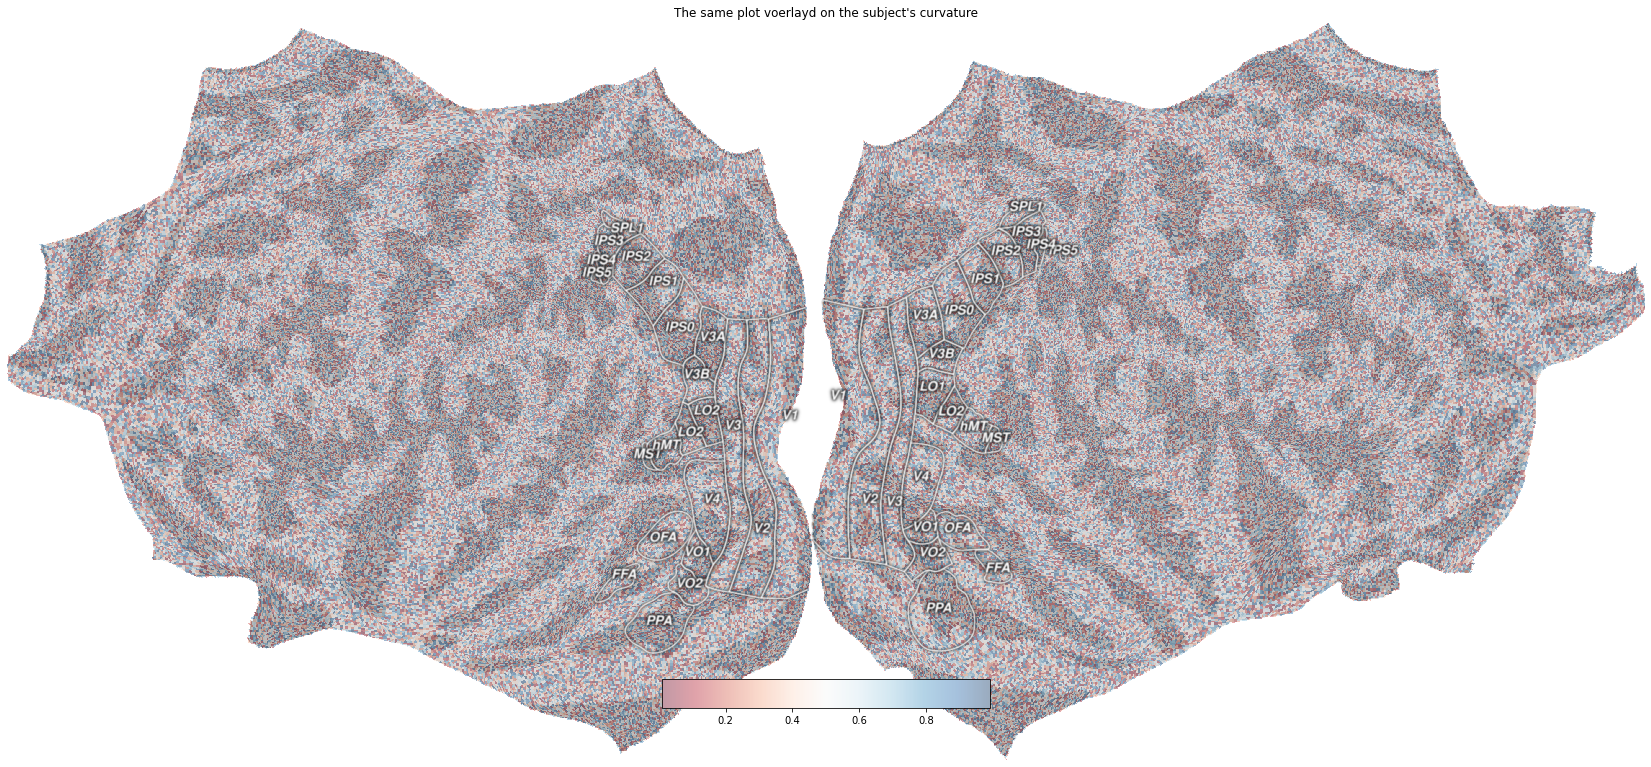

In [30]:
plt.figure()
cortex.quickflat.make_figure(vert,
                         with_rois=True,
                         with_labels=True,
                         with_curvature=True,  # plot curvature
                         curvature_contrast=0.2,  # contral contrast of curvature
                         curvature_brightness=0.7  # control brightness of curvature
                         )
plt.title("The same plot voerlayd on the subject's curvature")
plt.show()

Additional options for customizing the plot can be found [here](https://gallantlab.github.io/generated/cortex.quickflat.make_figure.html#cortex.quickflat.make_figure)

We can also gracefully deal with missing data, or plot desired ROIs only by filling the remaining indices of our data vector with numpy's 'not a number' value, which will make that part of the plot transparent.

For example, the functional Glasser atlas is defined for the fsaverage subject. We can create a mask that only selects vertices that are involved in the visual system:
https://neuroimaging-core-docs.readthedocs.io/en/latest/pages/atlases.html
